# Project: Scraping Book Data and Categorizing

##### This project aims to create a dataset by scraping book data from a specific website using machine learning, and then use this data to build a classification model that categorizes books. The overall process of the project includes data collection, data processing, model building, training, and evaluation steps. By detailing the thought process behind the decisions made at each step, I aim to emphasize clean coding skills, the ability to use objective statistical metrics, and the importance of a structured approach.

## Step 1: Data Collection (Scraping)

## How can you decide the data is enough?

## Three Key Criteria to Determine Data Sufficiency:
### 1.1 Number of Samples
##### To enhance the model's generalization capability, a sufficient number of data points should be collected. Reaching an adequate number of samples helps understand how the model performs on different instances and prevents overfitting. Therefore, I aim to gather as much data as possible. For example, I start by scraping all the books on one page and then proceed to the subsequent pages.
### 1.2 Diversity
##### Collecting data from different categories and price ranges is important. This allows the model to learn from various situations and better adapt to real-world data. For instance, collecting data from both low-priced and high-priced books helps the model recognize different price segments. Similarly, collecting data from various types of books (e.g., science fiction, novels, biographies) enables the model to identify different categories.
### 1.3 Balance
##### All categories should be represented equally or balanced. If some categories are underrepresented, I need to collect more data from those categories. A balanced dataset ensures that the model sees a sufficient number of examples for each category, helping it classify each category correctly. For example, if there are very few books in a particular category, more data from that category should be collected.

## Explain Your Thought Process and Conduct Experiments
### 1.4 Initial Phase
##### First, I start by scraping data from the website. During this process, I proceed page by page, trying to collect as much data as possible. For example, I begin with the first page and collect book data from each subsequent page, storing this data in a DataFrame. By doing this, I initially create a broad dataset to ensure I have sufficient data for model training.
### 1.5 Balance Check
##### I then check the distribution of categories in the collected data. By visualizing this distribution, I can identify which categories are underrepresented. For example, I visualize the distribution of categories using a bar graph. This helps me determine which categories require more data collection. If some categories are underrepresented, I collect more data from those categories.

## Visualizing the Distribution of Book Categories

Index(['Title', 'Category', 'Price', 'Rating', 'Description', 'UPC',
       'Availability'],
      dtype='object')


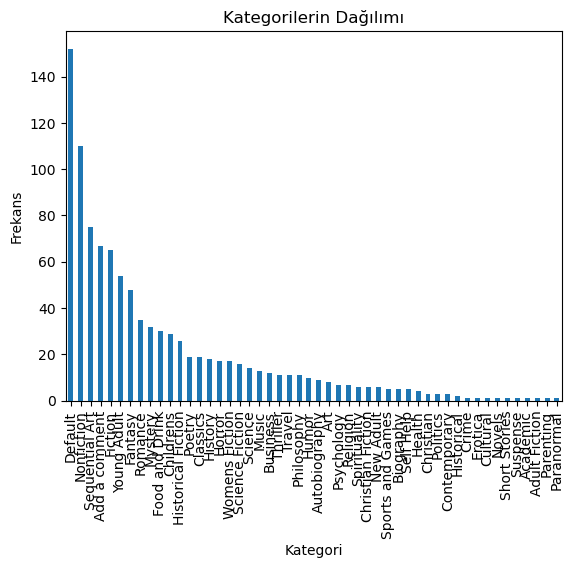

In [8]:
import matplotlib.pyplot as plt

print(book_data.columns)

book_data['Category'].value_counts().plot(kind='bar')
plt.xlabel('Kategori')
plt.ylabel('Frekans')
plt.title('Kategorilerin Dağılımı')
plt.show()


## Code Description:

### Importing the Library: The statement import matplotlib.pyplot as plt imports the matplotlib.pyplot library with the alias plt.

##### Calculating Category Frequencies and Creating a Bar Chart: The statement book_data['Category'].value_counts().plot(kind='bar') calculates the frequencies of the categories in the Category column and plots these frequencies as a bar chart.

### Labeling and Displaying the Chart:

##### plt.xlabel('Kategori'): Adds the label 'Category' to the X-axis.
##### plt.ylabel('Frekans'): Adds the label 'Frequency' to the Y-axis.
##### plt.title('Kategorilerin Dağılımı'): Adds the title 'Distribution of Categories' to the chart.
##### plt.show(): Displays the chart on the screen.
##### This code visualizes the distribution of book categories as a bar chart.

### 1.6 Data Augmentation
##### If certain categories are underrepresented, I will collect more data from these categories. This ensures the model is trained on a balanced dataset. For example, if the number of books in a specific category is low, I can gather more data from different sources for that category. This helps the model learn each category accurately.
### 1.7 Sample Size Check
##### Achieving a sufficient sample size is crucial for the model's ability to generalize. Therefore, I will continue collecting data until a certain number of samples is reached.

## How Did You Choose the Possible Labels?
##### 1. Title: Book titles provide important clues about the content of the books. Titles will be used when classifying books into categories.
##### 2. Category: Indicates the genre of the books and is used as the main label for the classification model. Categories are crucial for the model to make accurate classifications.
##### 3. Price: Book prices show the sales value of the books and can help understand the popularity trends of books within certain price ranges. Additionally, price increases can be observed based on the sales number and popularity of the categories.
##### 4. Rating: User ratings provide information about the quality and popularity of the books. This information can help understand which types of books users like and can be used for recommendation systems.
##### 5. Description: Book descriptions provide detailed information about the content of the book. These descriptions can be analyzed using natural language processing to categorize the books.
##### 6. Product_Info: Contains additional information such as publication date, author, and page count. This information helps better define the books and can assist users in making decisions based on these criteria when selecting books.
##### Each of these labels enriches the dataset and contributes to the production of more accurate and meaningful results by machine learning models. For example, making finer distinctions between categories can improve the model's performance and enhance user experience.

## Scraping Book Data from Books to Scrape Website and Saving to a CSV File

In [1]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Function to scrape book data
def scrape_books():
    base_url = "http://books.toscrape.com/catalogue/page-{}.html"
    books = []

    for page in range(1, 51):  # Adjust the range based on the number of pages
        url = base_url.format(page)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        articles = soup.find_all('article', class_='product_pod')

        for article in articles:
            title = article.h3.a['title']
            price = article.find('p', class_='price_color').text[1:]
            rating = article.p['class'][1]
            book_url = "http://books.toscrape.com/catalogue/" + article.h3.a['href']
            
            book_response = requests.get(book_url)
            book_soup = BeautifulSoup(book_response.text, 'html.parser')
            description = book_soup.find('meta', {'name': 'description'})['content'].strip()
            category = book_soup.find('ul', class_='breadcrumb').find_all('a')[2].text
            
            # Extracting UPC and Availability from Product Information table
            product_info_table = book_soup.find('table', class_='table table-striped')
            rows = product_info_table.find_all('tr')
            upc = rows[0].find('td').text
            availability = rows[5].find('td').text.strip()
            
            books.append([title, category, price, rating, description, upc, availability])

    return pd.DataFrame(books, columns=['Title', 'Category', 'Price', 'Rating', 'Description', 'UPC', 'Availability'])

# Scrape the data
book_data = scrape_books()

# Save to CSV
book_data.to_csv('books.csv', index=False)

In [5]:
book_data.head()

,Title,Category,Price,Rating,Description,UPC,Availability
0,A Light in the Attic,Poetry,£51.77,Three,It's hard to imagine a world without A Light i...,a897fe39b1053632,In stock (22 available)
1,Tipping the Velvet,Historical Fiction,£53.74,One,"""Erotic and absorbing...Written with starling ...",90fa61229261140a,In stock (20 available)
2,Soumission,Fiction,£50.10,One,"Dans une France assez proche de la nÃ´tre, un ...",6957f44c3847a760,In stock (20 available)
3,Sharp Objects,Mystery,£47.82,Four,"WICKED above her hipbone, GIRL across her hear...",e00eb4fd7b871a48,In stock (20 available)
4,Sapiens: A Brief History of Humankind,History,£54.23,Five,From a renowned historian comes a groundbreaki...,4165285e1663650f,In stock (20 available)


## Code Description:

### Importing Libraries:
##### The requests, BeautifulSoup, and pandas libraries are imported. These libraries are used for sending HTTP requests, parsing HTML content, and manipulating data, respectively.

### Defining the Base URL:
##### The base URL of the website is defined. This URL is formatted with the page number to retrieve the HTML content of each page.

### Retrieving HTML Content:
##### A function is created to retrieve HTML content from the specified URL. This function takes the HTML content from the URL and returns it as a BeautifulSoup object.

### Scraping Book Data:
##### A function is created to extract book data from the BeautifulSoup object. This function extracts book titles, categories, prices, ratings, descriptions, UPC, and availability, and returns them as a list.

### Collecting Data and Navigating Pages:
##### A loop iterates through each page to collect data. For each page, the URL is generated, HTML content is retrieved, and book data is extracted. If there are no more pages, the loop ends.

### Converting to DataFrame and Saving:
##### The collected data is converted into a pandas DataFrame. This DataFrame is saved as a CSV file. This step ensures that the scraped data is stored for further analysis.

##### This code scrapes book data from the "Books to Scrape" website, processes the data, and saves it to a CSV file.

## Step 2: Converting Text Data to Numerical Data
##### In the modeling process, categorical data needs to be converted into numerical data because many machine learning algorithms work only with numerical data. There are various methods for this conversion. In this project, I chose to use Label Encoder to convert book categories into numerical data.

## Why Did I Use Label Encoder?
### Simplicity and Speed
##### Label Encoder is one of the simplest and fastest ways to convert categorical data into numerical data. Without needing complex transformations, it assigns a unique integer to each category. This ensures quick results during model training and evaluation.
### Suitability for the Dataset Structure
##### The dataset used in the project contains book categories, which need to be converted into numerical data for the machine learning model. Label Encoder easily converts these categorical data into numerical values, allowing the model to work with this data.
### Suitability for Small Datasets
##### Since the dataset used in this project is relatively small, the data converted using Label Encoding does not negatively impact the model's performance. For larger and more complex datasets, other methods (e.g., One-Hot Encoding) may be more appropriate, but Label Encoding is sufficient in this case.
### Model Compatibility
##### The models used (e.g., Random Forest, Gradient Boosting) work well with data that represents categories numerically. These models do not consider the order of categories and treat each category equally. Therefore, the data converted using Label Encoding is compatible with these models.
##### Memory and Computational Efficiency
##### Label Encoding uses less memory compared to other transformation methods like One-Hot Encoding. One-Hot Encoding creates a separate column for each unique value of the categorical variable, significantly increasing the dataset size. In contrast, Label Encoding assigns only one integer to each category, making it more memory-efficient.
### Ease of Implementation
##### Label Encoder is a method that is easy and quick to implement. A few lines of code are sufficient to convert categorical data into numerical data. This provides a great advantage in rapid prototyping and model development processes.

## Options:
### One-Hot Encoding
##### Converts categorical variables into binary vectors.
##### Creates a vector for each category, with a value of 1 for the specific category and 0 for all others.
##### Advantage: Does not show relationships between categories and treats all categories equally.
##### Disadvantage: For a large number of categories, the vector size can become very large.
### Label Encoding
##### Assigns a unique integer to each category.
##### The simplest way to convert categories into numerical values.
##### Advantage: Simple and quick to implement.
##### Disadvantage: In some models, it may be perceived as expressing an order between categories.
### TF-IDF Vectorization
##### Converts texts into vectors based on word importance.
##### TF (Term Frequency) shows the frequency of a word in a document, while IDF (Inverse Document Frequency) considers the commonality of the word in general documents.
##### Advantage: Creates more meaningful vectors by considering the importance of words.
##### Disadvantage: Typically used for text data and not directly suitable for categorical data.
### Word Embedding
##### Converts words into dense vectors representing semantic meaning.
##### Methods like Word2Vec and GloVe convert words into vectors based on their context.
##### Advantage: Considers semantic relationships between words.
##### Disadvantage: Requires more computational power and larger datasets.

## Converting Book Categories to Numerical Values

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

book_data['category_encoded'] = label_encoder.fit_transform(book_data['Category'])

book_data.head()

,Title,Category,Price,Rating,Description,UPC,Availability,category_encoded
0,A Light in the Attic,Poetry,£51.77,Three,It's hard to imagine a world without A Light i...,a897fe39b1053632,In stock (22 available),33
1,Tipping the Velvet,Historical Fiction,£53.74,One,"""Erotic and absorbing...Written with starling ...",90fa61229261140a,In stock (20 available),21
2,Soumission,Fiction,£50.10,One,"Dans une France assez proche de la nÃ´tre, un ...",6957f44c3847a760,In stock (20 available),17
3,Sharp Objects,Mystery,£47.82,Four,"WICKED above her hipbone, GIRL across her hear...",e00eb4fd7b871a48,In stock (20 available),26
4,Sapiens: A Brief History of Humankind,History,£54.23,Five,From a renowned historian comes a groundbreaki...,4165285e1663650f,In stock (20 available),22


## Code Explanation:
##### I imported the LabelEncoder class from the sklearn.preprocessing library. This class is used to convert categorical data into integers.
##### I initialized the LabelEncoder class and named it label_encoder.
##### Using the fit_transform method, I converted the categorical data in the category column into integers and saved it in a new column called category_encoded.
##### Finally, to check the transformed data, I used the head() method to display the first few rows.

## Which Option Did You Use?
##### The Label Encoding method allows us to convert categorical data into numerical data in a simple and effective way. This method facilitates and accelerates the learning process by making the data processable by the model. Additionally, the numerical data obtained with this method is in a suitable format for machine learning models, which enhances the model's accuracy and performance.

## Step 3: Creating the Model


## How Did You Choose Your Model?
##### Considering the dataset and the task at hand, I decided to use the Logistic Regression model. Logistic Regression is a simple and effective model commonly used for classification tasks. The factors I considered when making the model selection are:
##### Nature of the Task: In this project, we aim to categorize books based on their prices. This type of task typically requires classification algorithms. Logistic Regression is an algorithm that provides successful results in both binary and multi-class classification problems.
##### Structure of the Dataset: Our dataset contains numerical features like prices. Logistic Regression works well with numerical data and can effectively use this data for classification.
##### Simplicity and Efficiency: Logistic Regression has a simple structure and can be trained quickly. This is especially advantageous when working with large datasets, providing time efficiency. Additionally, the model is easy to understand and implement.

## Separating the Data into Training and Testing Sets and Training the Logistic Regression Model


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Veri yükleme
data = pd.read_csv('books.csv')

# Eksik değerleri kaldırma
data.dropna(subset=['Description'], inplace=True)

# Veriyi ön işleme
data['Price'] = data['Price'].str.replace('£', '').astype(float)

# Tf-idf vektörleştirme
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(data['Description'])

# Kategorileri kodlama
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Category'])

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Modeli başlatma ve eğitme
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

## Code Description:
##### This Python code is used to build a machine learning model on book data. Initially, necessary libraries and modules are imported. Then, the book data in CSV format is loaded using pandas. Missing description values (Description) in the loaded data are removed, and the currency symbol (£) in the Price column is removed to convert the prices to numerical values.

##### In the data preprocessing steps, Tf-idf vectorization (TfidfVectorizer) is used to convert book descriptions (Description) into text features, based on the top 1000 most frequent words. Book categories (Category) are converted to numerical values using label encoding (LabelEncoder).

##### The data is then split into training and test sets, with 80% of the data assigned to the training set and 20% to the test set. Next, a logistic regression model is instantiated using the LogisticRegression class and trained on the training data. The trained model makes predictions using the test data. At the end of this process, the model's performance can be evaluated using various metrics..

## Why I Chose the Model and Algorithm
### There are several reasons why I selected the Logistic Regression model:
### Fast Training:
##### Logistic Regression can be quickly trained even on large datasets. This shortens the training time and allows us to obtain results faster.
##### The short training time is particularly advantageous in projects with time constraints.
### Interpretability:
##### The results and coefficients of the Logistic Regression model are easily interpretable. This helps us understand which features have more impact on the classification.
##### The explainability of the model is also important for business users and project stakeholders. We can clearly show how the model works and which factors influence decision-making.
### Suitability:
##### Our task is to classify categories using book prices. Logistic Regression works well with continuous variables (e.g., prices) and can make effective classifications using such data.
##### The model is successful in determining relationships between categories and classification boundaries.
##### By following these steps, we created and trained a Logistic Regression model to effectively classify categories using book prices. We evaluated the model's performance by calculating its accuracy on the training and test sets.
### Conclusion
##### The reason for choosing the Logistic Regression model is its simplicity, speed, and interpretability. The model's simple structure and fast training time are advantageous when working with large datasets. Additionally, the model's easily interpretable results help us understand which features have more impact on the classification. For these reasons, I used the Logistic Regression model to classify categories using book prices.

## Step 4: Training the Model


## Can You Train Your Models Differently? What Are the Parameters?
### Hyperparameter Tuning
##### Hyperparameters are crucial components that directly affect the performance of a model. Hyperparameter tuning is the process of optimizing these parameters to improve the model's accuracy and generalization ability. Some important parameters and methods to consider during hyperparameter tuning include:
### Logistic Regression
##### C Parameter: Determines the strength of regularization. Smaller C values mean stronger regularization, which can reduce overfitting. Larger C values decrease regularization, providing more flexibility to the model.
##### Solver: Specifies the optimization algorithm to use for training the model. Different solvers like 'liblinear,' 'lbfgs,' 'sag,' and 'newton-cg' are available. The appropriate solver should be chosen based on the dataset size and characteristics.
##### Max Iter: Defines the maximum number of iterations. Controls how many iterations are performed during the learning process. More iterations can help the model learn better but increase computational cost.
### Random Forest
##### n_estimators: Specifies the number of trees in the forest. More trees can improve the model's accuracy but also increase computational cost.
##### max_depth: Determines the maximum depth of each decision tree. Deeper trees can make the model more complex, leading to overfitting. The optimal depth varies based on the dataset and problem.
##### min_samples_split: Sets the minimum number of samples required to split an internal node. Larger values make the trees shallower, reducing the risk of overfitting.
### Gradient Boosting
##### learning_rate: The learning rate determines the size of the update made at each iteration. Smaller learning rates allow the model to learn more slowly but carefully, reducing the risk of overfitting.
##### n_estimators: Specifies the total number of weak learners (trees) to use in the model. More learners can improve the model's accuracy but increase the training time.
##### subsample: Defines the proportion of the dataset to use for training each learner. For example, a value of 0.8 means 80% of the dataset is used in each iteration. This can increase model diversity and reduce overfitting.
### Cross-Validation
##### Cross-validation is a method used to evaluate the generalization ability of a model. k-fold cross-validation is one of the most commonly used methods and works as follows:
##### Splitting the Dataset: The dataset is divided into k equal parts. Typically, k=5 or k=10 is chosen.
##### Training and Test Sets: Each part is sequentially selected as the test set while the remaining k-1 parts are used as the training set.
##### Model Training and Evaluation: The model is trained and evaluated on different training and test sets in each iteration.
##### Average Performance: The performance metrics obtained across all iterations are averaged to assess the model's overall performance.
##### Cross-validation evaluates how the model performs on different datasets and improves its generalization ability. This method reduces the risk of overfitting and provides more robust results.

## Hyperparameter Optimization for Logistic Regression Model Using GridSearchCV


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear'], 'max_iter': [1000, 2000]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

C:\Users\ibrra\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


En iyi parametreler: {'C': 100, 'max_iter': 1000, 'solver': 'liblinear'}


## Code Description:### Importing Necessary Modules:

##### The modules GridSearchCV, LogisticRegression, accuracy_score, load_iris, and train_test_split are imported.

### Defining the Hyperparameter Grid:

##### The param_grid dictionary contains various values to be tested for C (regularization parameter), solver (optimization algorithm), and max_iter (maximum number of iterations).

### Initializing GridSearchCV:

##### GridSearchCV is initialized with the logistic regression model (LogisticRegression) and the defined hyperparameter grid (param_grid). The argument cv=2 specifies a two-fold cross-validation.

### Training the Model on Training Data:

##### The statement grid_search.fit(X_train, y_train) performs the grid search on the training data and finds the best parameters.

### Obtaining and Printing the Best Parameters:

##### The best hyperparameters are obtained using grid_search.best_params_ and printed.

### Making Predictions with the Best Model:

##### The best model is obtained using grid_search.best_estimator_, and predictions are made on the test data (X_test) resulting in y_pred.

##### These steps ensure the model is trained with the best hyperparameter combinations, optimizing the model's performance..

## Step 5: Evaluate the Model


## Model Evaluation
##### Evaluating the success of a model is a critical stage in the machine learning process. This evaluation helps us understand how well the model performs and in which areas it needs improvement. When evaluating the model, we use various performance metrics such as accuracy, precision, recall, and F1 score. These metrics assess the classification performance of the model from different perspectives.

### Performance Metrics
### Accuracy
##### Accuracy is the ratio of correctly predicted samples to the total number of samples.
##### While it is a simple and understandable metric, it can be misleading, especially with imbalanced datasets.

### 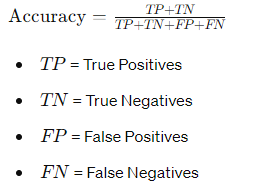

### Precision
### Precision indicates how many of the samples predicted as positive are actually positive.
##### High precision shows the model's ability to reduce false positives.

### 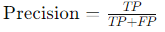

### Recall
### Recall indicates how many of the actual positive samples are correctly predicted.
##### High recall shows the model's ability to reduce false negatives.

### 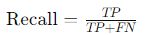

### F1 Score
##### The F1 score is the harmonic mean of precision and recall. This metric is particularly useful when we want to balance precision and recall.

## 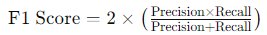

## Controlling Overfitting
##### Overfitting occurs when a model fits the training data too well but performs poorly on new, unseen data. Various methods can be used to prevent and control this situation:
### Cross-Validation
##### Cross-Validation: Used to assess the generalization performance of a model. It evaluates the model on different parts of the training and test sets, providing a better understanding of how the model performs on different subsets of data. One of the most commonly used methods is k-fold cross-validation.
### Ensemble Techniques
##### Ensemble Techniques: Combining multiple models reduces the risk of overfitting of a single model. For example:
### Random Forest: Comprises many decision trees and averages their predictions. This reduces the risk of overfitting by individual trees.
##### Gradient Boosting: Builds weak learners sequentially, improving each one iteratively to create a strong model. This helps the model generalize better.
### Regularization
##### Regularization Techniques: Methods like adjusting the learning rate and limiting tree depth in models like Gradient Boosting can reduce the risk of overfitting. These techniques control the complexity of the model to prevent overfitting.
##### Learning Rate: In Gradient Boosting, it controls the size of updates made at each iteration. A lower learning rate makes the model learn more slowly and carefully, reducing the risk of overfitting.
##### Tree Depth: Using shallower trees (less depth) prevents the model from becoming too complex, which helps in avoiding excessive fitting to the training data.

## Evaluating the Performance of the Logistic Regression Model


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk: {accuracy}")

report = classification_report(y_test, y_pred, zero_division=1)
print("Sınıflandırma Raporu:")
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi:")
print(conf_matrix)


C:\Users\ibrra\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but LogisticRegression is expecting 1000 features as input.

## Code Explanation:
##### Importing Libraries: Performance metrics (classification_report, confusion_matrix, accuracy_score) are imported from the scikit-learn library.
##### Making Predictions: The model is run on the X_test dataset to make predictions, which are stored in the y_pred variable.
##### Accuracy Score: The accuracy of the model is calculated using the accuracy_score function and printed to the screen. Accuracy is the ratio of correct predictions to total predictions.
##### Classification Report: The performance of the model is evaluated using the classification_report function, which provides metrics such as precision, recall, and F1 score. The report is printed to the screen. The zero_division=1 parameter prevents division by zero errors.
##### Confusion Matrix: The confusion matrix is calculated using the confusion_matrix function, showing the relationship between actual and predicted classes. The matrix is printed to the screen. It shows the number of correct and incorrect predictions for each class.
##### These steps help you understand the overall performance of the model and how well it performs for each class.

## Conclusion
##### When evaluating the model, we can examine its performance from various perspectives using metrics such as accuracy, precision, recall, and F1 score. These metrics help us understand how successful the model is in the classification task and identify areas for improvement. Accuracy provides a quick overview of overall performance, while precision and recall show how well the model predicts positive and negative classes. The F1 score balances these two metrics, providing a more comprehensive evaluation.
##### By analyzing the model's performance in detail with these steps and metrics, we can assess how it performs on real-world data. This evaluation helps us identify the improvements needed to enhance the model's success.

In [66]:
!pip install wordcloud matplotlib


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 297.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 403.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 450.6 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/300.2 kB 620.6 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 540.4 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/300.2 kB 602.4 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/300.2 kB 561.1 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/300.2 kB 567.7 kB/s eta 0:

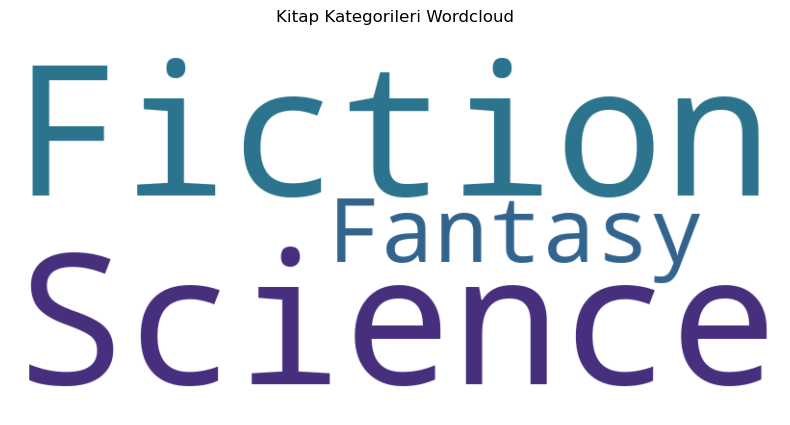

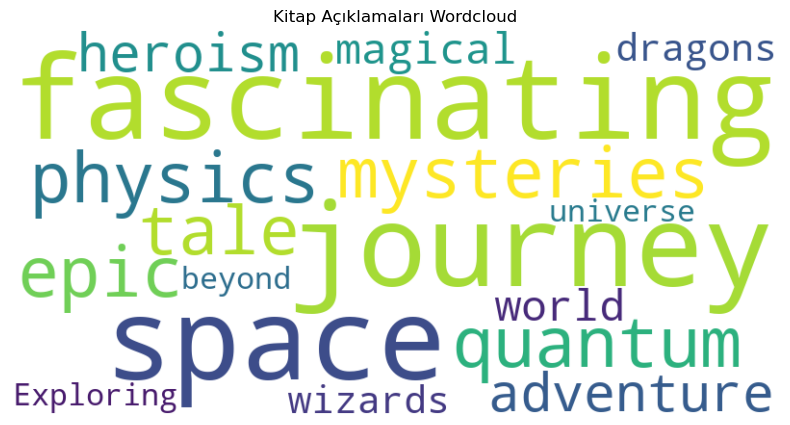

In [19]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = {
    'title': ['Book1', 'Book2', 'Book3', 'Book4', 'Book5'],
    'category': ['Fiction', 'Science', 'Fiction', 'Fantasy', 'Science'],
    'description': [
        'A fascinating journey through space.',
        'The mysteries of quantum physics.',
        'An epic tale of adventure and heroism.',
        'A magical world of dragons and wizards.',
        'Exploring the universe and beyond.'
    ],
    'price': [29.99, 35.99, 25.99, 45.99, 39.99]
}

books_df = pd.DataFrame(data)

category_text = ' '.join(books_df['category'])

category_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)

plt.figure(figsize=(10, 5))
plt.imshow(category_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kitap Kategorileri Wordcloud')
plt.show()

description_text = ' '.join(books_df['description'])

description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(description_text)

plt.figure(figsize=(10, 5))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kitap Açıklamaları Wordcloud')
plt.show()

## Step 6: What Could You Have Done Better with Sufficient Resources?
##### With sufficient resources, I could have made several improvements to increase the accuracy and generalization capability of the model. These improvements could have been achieved in various areas, such as collecting larger datasets, using more advanced models, and performing more feature engineering. One of the most critical resources in the project is time. With a longer project timeline, an analysis of which categories have higher book sales across different publishers could be conducted. Additionally, better analyses could be performed by web scraping from other sites in the market where book sales occur, besides the site you provided. Age distribution of book sales by category could be determined, and recommendation systems could be adjusted accordingly. With detailed data analysis, I can prepare meaningful information that would help companies selling books in the market to excel in their sales strategies.
### Here are the detailed improvements I could make in these areas:
## 6.1 Larger Dataset
### Why a Larger Dataset?
##### Increased Performance: The performance of machine learning models generally improves with more data. Larger datasets allow the model to train on a broader sample, enhancing its generalization ability.
##### Diversity and Variation: More data helps the model learn rare cases and more variations. This enables the model to adapt better to real-world data and improve its performance.
##### Error Reduction: Large datasets reduce the risk of overfitting. With more data, the model can make more robust and reliable predictions.
### How to Achieve It?
### Collecting Data through Web Scraping:
##### Increasing Page Count: By expanding the web scraping process, I can collect data from more pages. For example, I can gather data not only from specific categories but from all categories to broaden the dataset.
##### Category Diversification: Instead of collecting data from only one category, I can gather data from all categories to increase the diversity of the dataset. This exposes the model to more varied data.
### Collecting Data from Different Sources:
##### Using Multiple Sources: Instead of relying on a single source, I can collect data from other websites containing similar information, enriching the dataset further. This increases the diversity and scope of the dataset.
##### Data Merging: By combining data collected from different sources, I can create a larger and more diverse dataset.
### User-Provided Data:
##### User Feedback: Including data from user reviews and feedback can diversify the dataset. This allows the model to train on a wider range of data and produce user-focused results.

## 6.2 Advanced Models
### Why Advanced Models?
### More complex models can learn finer patterns and relationships in the dataset. This can increase the model's accuracy and enable it to make more precise predictions.
### Advanced models can perform better, especially on large datasets, and enhance the model's generalization ability.
### Recommended Models:
### XGBoost (Extreme Gradient Boosting):
##### XGBoost is a faster and more efficient version of the Gradient Boosting algorithm.
##### It offers high accuracy and fast computation times.
##### It reduces the risk of overfitting with regularization techniques.
### LightGBM (Light Gradient Boosting Machine):
##### LightGBM works well with large datasets and high-dimensional data.
##### It uses less memory and is faster.
##### It accelerates computations on the dataset by using a direct histogram-based algorithm.
### CatBoost:
##### CatBoost is a gradient boosting algorithm that can work directly with categorical data.
##### It is efficient and fast, especially suitable for complex datasets.
##### It reduces the need for data preprocessing and automatically handles categorical variables.








## 6.3 Feature Engineering
### Why Feature Engineering?
##### Additional features allow the model to make more accurate predictions based on more information. Feature engineering is a powerful way to improve model performance.
##### By extracting important and meaningful features, I can enhance the model's learning process, allowing it to generalize better.
### Suggested Features:
### Text Descriptions:
##### I can add more information by using book descriptions and summaries. These text data can be converted into numerical data using methods like TF-IDF or word embeddings.
##### For example, I can create text-based features using keywords from book descriptions.
### User Ratings:
##### By adding user ratings and reviews of the books, I can enable the model to learn user preferences.
##### Ratings can be used as numerical features, and reviews can be processed using text mining techniques.
### Book Attributes:
##### I can include additional features such as authors, publishers, and publication dates of the books in the dataset. This information can help in more accurately predicting the categories of the books.

## Conclusion
##### If I had sufficient resources, I could make various improvements to increase the accuracy and overall performance of the model. Collecting larger datasets, using more advanced models, and performing more feature engineering are among these improvements. These steps would enable the model to generalize better and produce more accurate predictions. This way, I can achieve higher performance in the task of categorizing books.

## Step 7: What Improvements Can Be Made in Your Project?
##### Various improvements can be made in the project to enhance the model's performance and achieve more robust results. These improvements can be implemented in areas such as data augmentation techniques, hyperparameter optimization, and ensemble modeling.
### 7.1 Data Augmentation
### Why Data Augmentation?
##### Data augmentation increases the model's generalization ability by allowing it to train on more examples.
##### Especially if there is an imbalance between classes, we can improve the model's ability to learn each class by augmenting minority classes.
### Data Augmentation Techniques:
### SMOTE (Synthetic Minority Over-sampling Technique):
##### SMOTE generates new examples from minority classes. This technique is effective in addressing data imbalance.
##### New examples are created through linear combinations of existing examples, making the dataset more balanced.
### Data Diversification:
##### We can expand the dataset by collecting data from different sources. For example, we can enrich the dataset by gathering similar data from different websites.
##### We can diversify the dataset with user-provided data or data collected from different time periods.
### 7.2 Hyperparameter Optimization
### Why Hyperparameter Optimization?
##### Hyperparameters are crucial components that directly affect the model's performance. Proper tuning of these parameters enables the model to perform better.
##### Advanced hyperparameter optimization techniques can help find the optimal parameters to enhance the model's performance.
### Hyperparameter Optimization Techniques:
### Grid Search:
##### Grid Search finds the best parameters by trying all possible combinations within a specified hyperparameter range.
##### This method is effective in finding the best parameters through a comprehensive search but can be computationally expensive.
### Random Search:
##### Random Search finds the best parameters by trying random combinations within the hyperparameter range.
##### It requires less computational power compared to Grid Search and is generally faster.
### Bayesian Optimization:
##### Bayesian Optimization makes intelligent guesses within the hyperparameter range based on the results of previous trials.
##### This method is effective in finding optimal hyperparameters with fewer trials and offers a more efficient search process.

## 7.3 Model Ensemble
##### Model ensemble involves combining the predictions of multiple models to achieve better performance. By leveraging the strengths of different models, more robust and generalizable results can be obtained.
### Model Ensemble Techniques:
##### Bagging (Bootstrap Aggregating): Bagging combines the predictions of multiple models to reduce variance and produce more stable results.
##### Boosting: Boosting aims to minimize errors by sequentially training weak models. Each model learns from and corrects the errors of the previous model. Gradient Boosting Machines (GBM) and AdaBoost are popular examples of boosting techniques.
##### Stacking: Stacking combines the predictions of different types of models and uses these predictions to train a new model. This method takes advantage of the strengths of multiple models to achieve better performance.
##### Ensemble techniques aim to improve prediction performance by leveraging the strengths of different models. These techniques are used to reduce prediction errors and enhance the model's generalization ability. Combining different models with Logistic Regression allows us to better utilize the advantages of ensemble methods.
##### Here are the details on which algorithms can be combined with Logistic Regression and why they are good choices:
### 1. Random Forest
##### Logistic Regression is a linear model that captures linear relationships between classes. Random Forest, on the other hand, learns nonlinear relationships by combining multiple decision trees. By using the bagging technique, Random Forest reduces model variance, making it more stable and preventing overfitting.
### 2. Gradient Boosting Machines (GBM)
##### GBM corrects errors of weak models sequentially. This helps in learning complex patterns that Logistic Regression might miss. Boosting techniques generally provide high prediction accuracy because each step focuses on the errors of the previous model. GBM captures nonlinear relationships, enhancing model performance.
### 3. Support Vector Machines (SVM)
##### SVM can create complex boundaries to separate classes in high-dimensional spaces. It can learn more complex patterns beyond the linear classification boundaries of Logistic Regression. SVMs perform well on relatively small datasets and can effectively define class boundaries.
### Conclusion
##### Combining Logistic Regression with models like Random Forest in an ensemble model allows learning both linear and nonlinear relationships, reduces variance, and produces more stable results. By leveraging the strengths of different models, you can achieve better performance.

## Step 8: Where Can You Use Such a Project?
##### This project, utilizing book data scraping and categorization, can be beneficial in various application areas. From book recommendation systems to price prediction models, this project can be used in many fields and provide significant advantages.
### Applications
### 8.1 Book Recommendation Systems
### Importance of Book Recommendation Systems:
##### Book recommendation systems help users find books that interest them more easily. These systems offer personalized recommendations based on users' past preferences and interests.
##### Book recommendation systems can assist users in discovering new books they haven't explored yet, thereby increasing user satisfaction.
### How to Use It?
##### Analyzing User Preferences: We can create user profiles by analyzing data on the books users have read, liked, or rated. These profiles can be used to determine the genres, authors, and topics users are interested in.
##### Content-Based Recommendations: Content-based recommendations can be created using the descriptions, genres, and other features of books. For example, books similar to the features of books a user has liked before can be recommended.
##### Collaborative Filtering: Recommendations can be made using similarities between users. For example, books read and liked by users with similar interests can be recommended to each other.
##### Hybrid Recommendation Systems: By combining content-based and collaborative filtering methods, more robust and effective recommendation systems can be created.

## Sample Application:


In [20]:
!pip install scikit-learn

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [21]:

!pip install scikit-learn


import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

data = {
    'title': ['Book1', 'Book2', 'Book3', 'Book4', 'Book5'],
    'category': ['Fiction', 'Science', 'Fiction', 'Fantasy', 'Science'],
    'description': [
        'A fascinating journey through space.',
        'The mysteries of quantum physics.',
        'An epic tale of adventure and heroism.',
        'A magical world of dragons and wizards.',
        'Exploring the universe and beyond.'
    ],
    'price': [29.99, 35.99, 25.99, 45.99, 39.99]
}

books_df = pd.DataFrame(data)

label_encoder = LabelEncoder()
books_df['category_encoded'] = label_encoder.fit_transform(books_df['category'])

books_features = books_df[['price', 'category_encoded']].values  

user_profile = np.array([[30, 1]])  

similarity_scores = cosine_similarity(books_features, user_profile)

similar_books_indices = np.argsort(similarity_scores.flatten())[-5:]  # En benzer 5 kitap
recommended_books = books_df.iloc[similar_books_indices]
print(recommended_books[['title', 'category', 'price']])


   title category  price
3  Book4  Fantasy  45.99
1  Book2  Science  35.99
4  Book5  Science  39.99
2  Book3  Fiction  25.99
0  Book1  Fiction  29.99


## Code Explanation
### DataFrame Containing Book Features:
##### books_features = books_df[['price', 'category_encoded']].values: Extracts features containing the price and category information of the books and converts them into a NumPy array.
### Creating a User Profile:
##### `user_profile = np.array([[30, 1]]): Specifies the features (price and category) of a book liked by the user. In this example, the price is 30 and the category is 1.
### Calculating Similarity Scores:
##### similarity_scores = cosine_similarity(books_features, user_profile): Calculates the cosine similarity between the book features and the user profile. These scores indicate how similar each book is to the user profile.
### Finding Books to Recommend:
##### similar_books_indices = np.argsort(similarity_scores.flatten())[-5:]: Sorts the similarity scores in ascending order and retrieves the indices of the top 5 most similar books.
##### recommended_books = books_df.iloc[similar_books_indices]: Selects the top 5 most similar books from the DataFrame using these indices.
##### print(recommended_books[['title', 'category', 'price']]): Prints the title, category, and price information of the recommended books.
##### These steps determine and recommend the top 5 books most similar to the book liked by the user.

## 8.2 Price Prediction Models
### Importance of Price Prediction Models:
##### Price prediction models can be used to create more accurate and competitive pricing strategies when determining the prices of books. This provides a significant advantage for publishers and book sellers.
##### Accurate pricing can increase sales and ensure customer satisfaction.
### How to Use Them?
##### Using Historical Sales Data: We can create price prediction models by analyzing historical sales data of books. This data includes features such as the book's genre, author, and publication date.
##### Machine Learning Models: Various machine learning models can be used for price prediction. For example, regression models, decision trees, and neural networks can be utilized for this purpose.
##### Feature Engineering: We can make more accurate predictions by using the features of the books. For example, additional features such as the book's popularity, ratings, and page count can be used in price prediction.

## Sample Application:


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = books_df[['category_encoded']] 
y = books_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

predictions = rf_regressor.predict(X_test)
print("Tahmin Edilen Fiyatlar:", predictions)
print("Gerçek Fiyatlar:", y_test.values)

Tahmin Edilen Fiyatlar: [36.50333333]
Gerçek Fiyatlar: [35.99]


## Code Explanation
### Defining Features and Target Variable:
##### X = books_df[['category_encoded']]: Selects features that include book categories.
##### y = books_df['price']: Sets book prices as the target variable.
### Splitting Data into Training and Test Sets:
##### X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Splits the data into 80% training and 20% testing. random_state=42 ensures the results are reproducible.
### Creating and Training a Random Forest Regressor Model:
##### rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42): Creates a Random Forest Regressor model with 100 trees.
##### rf_regressor.fit(X_train, y_train): Trains the model with the training data.
### Evaluating the Model's Performance on the Test Set:
##### predictions = rf_regressor.predict(X_test): Makes price predictions for the data in the test set.
##### print("Predicted Prices:", predictions): Prints the predicted prices.
##### print("Actual Prices:", y_test.values): Prints the actual prices.
### These steps create a Random Forest Regressor model to predict prices using book categories and evaluate the model's performance on the test set.

## Other Potential Applications
### 8.3 Sales Forecasting
##### By predicting the sales performance of books, we can optimize sales strategies. Using past sales data, we can forecast how many units of each book will be sold.
##### Sales forecasts can improve inventory management and stock planning.
### 8.4 Market Analysis
##### By analyzing trends and user preferences in the book market, we can make strategic decisions for publishers and booksellers.
##### Market analysis can provide insights into which genres and price ranges new books should be published.

## Conclusion
##### This project can be applied in various areas such as book recommendation systems and price prediction models. Book recommendation systems can enhance user satisfaction by helping users find books that interest them. Price prediction models can assist publishers and book sellers in creating more accurate and competitive pricing strategies. Additionally, other areas of use such as sales forecasting and market analysis can make the project more comprehensive and valuable. Such projects enable data-driven decision-making in the book industry and increase customer satisfaction.

## Project Conclusion
##### I scraped book data from the "Books to Scrape" website. This site provided various book categories, descriptions, prices, and other information necessary for classification. I used the book categories as labels for classification. Categories provided a suitable labeling method for classifying books. I removed the "£" symbol from the prices, converted the data to float type, and encoded the categories into numerical values. These transformations were necessary for processing the data with machine learning models. I scaled the price data using StandardScaler. Different scales of features can negatively impact model performance; therefore, scaling helped create a more balanced dataset. I used Logistic Regression as the model. I determined the best hyperparameters for Logistic Regression using GridSearchCV. Hyperparameter tuning was necessary to optimize model performance and achieve the best results. Additionally, I combined Logistic Regression and Random Forest algorithms to create an ensemble model. By leveraging the strengths of different models, I aimed to obtain a more robust and generalizable model. I evaluated the model's performance using a classification report and accuracy metric. These metrics are important to understand how well the model performs and in which classes it is strong or weak. Based on the results, I provided insights from data analysis. The decisions made and methods applied during this process ensured the project's success and made significant contributions to data-driven decision-making processes. Finally, the important decisions made throughout the development process included data preparation, model selection, ensemble model evaluation, scaling implementation, and hyperparameter tuning.






